In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import genextreme, genpareto

In [24]:
dataset = pd.read_csv("/Users/mathis/Desktop/dataset projet evt 3.csv")

In [37]:
dataset['observation_date'] = pd.to_datetime(dataset['observation_date'])


In [38]:
dataset['DFF_diff'] = dataset['DFF'].diff()
dataset = dataset.dropna(subset=['DFF_diff'])

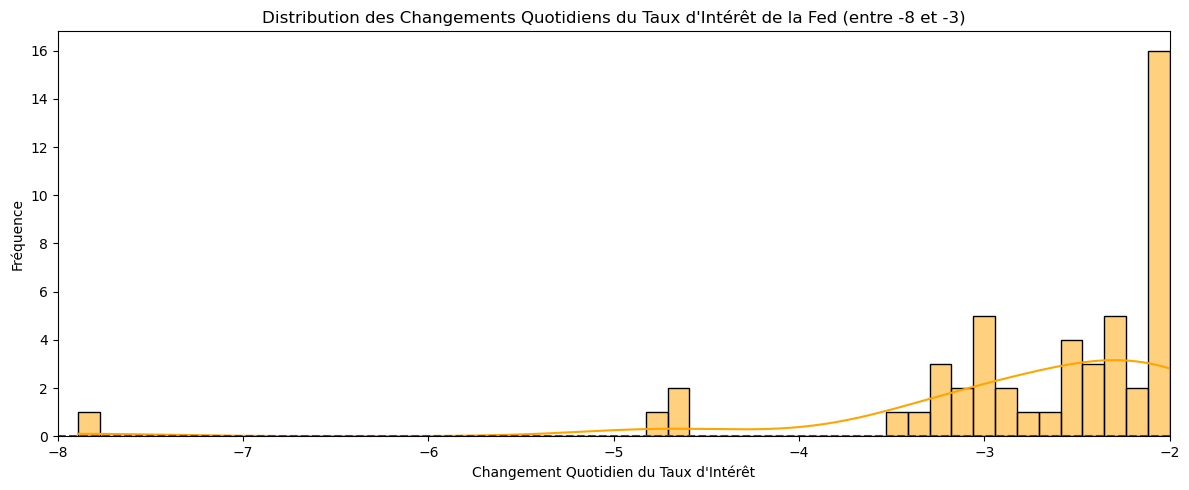

In [51]:
# Deuxième graphique : entre -8 et -3
plt.figure(figsize=(12, 5))
sns.histplot(dataset[(dataset['DFF_diff'] >= -8) & (dataset['DFF_diff'] <= -2)]['DFF_diff'], bins=50, kde=True, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlim(-8, -2)
plt.title('Distribution des Changements Quotidiens du Taux d\'Intérêt de la Fed (entre -8 et -3)')
plt.xlabel('Changement Quotidien du Taux d\'Intérêt')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

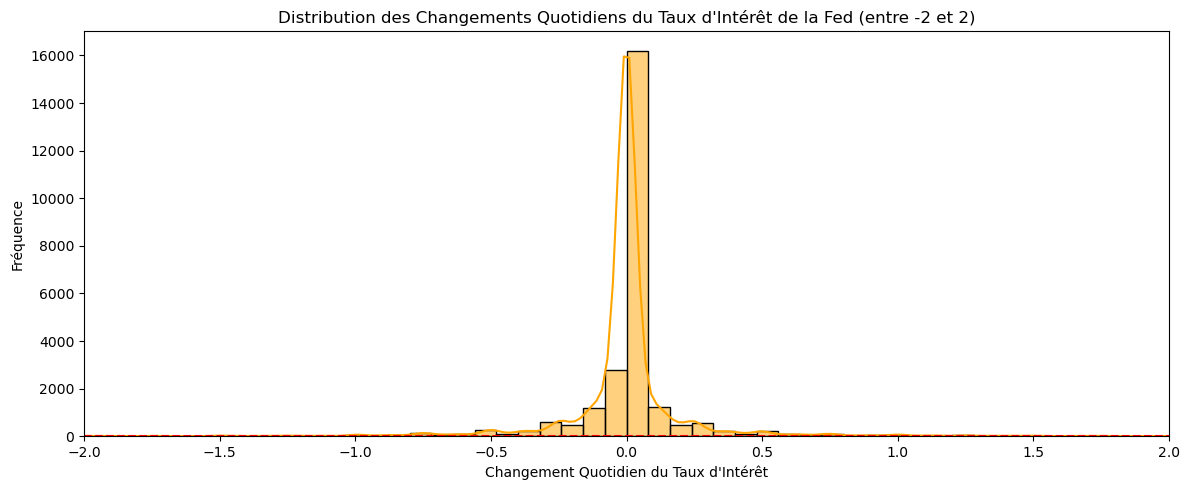

In [46]:
plt.figure(figsize=(12, 5))
sns.histplot(dataset[(dataset['DFF_diff'] >= -2) & (dataset['DFF_diff'] <= 2)]['DFF_diff'], bins=50, kde=True, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlim(-2, 2)
plt.title('Distribution des Changements Quotidiens du Taux d\'Intérêt de la Fed (entre -2 et 2)')
plt.xlabel('Changement Quotidien du Taux d\'Intérêt')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

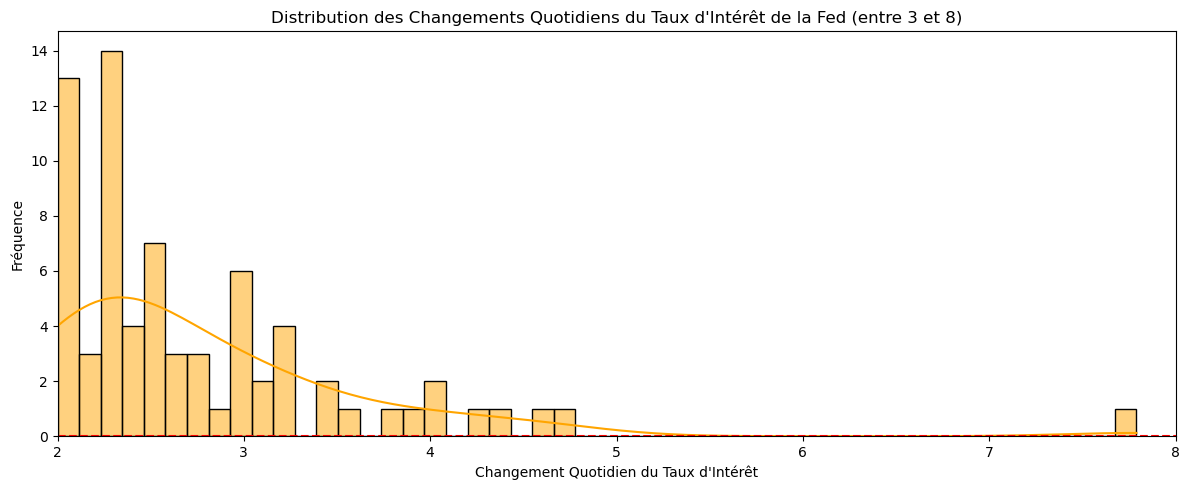

In [52]:
plt.figure(figsize=(12, 5))
sns.histplot(dataset[(dataset['DFF_diff'] >= 2) & (dataset['DFF_diff'] <= 8)]['DFF_diff'], bins=50, kde=True, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlim(2, 8)
plt.title('Distribution des Changements Quotidiens du Taux d\'Intérêt de la Fed (entre 3 et 8)')
plt.xlabel('Changement Quotidien du Taux d\'Intérêt')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

kde = Kernel Density Estimation.méthode qui permet d'obtenir une courbe de densité continue.Elle donne une estimation de la probabilité de la distribution des données sur l'ensemble de l'échantillon. 

In [28]:
thresh = np.percentile(dataset['DFF'].dropna(), 95)  # Seuil au 95%
extremes = dataset[dataset['DFF'] > thresh]

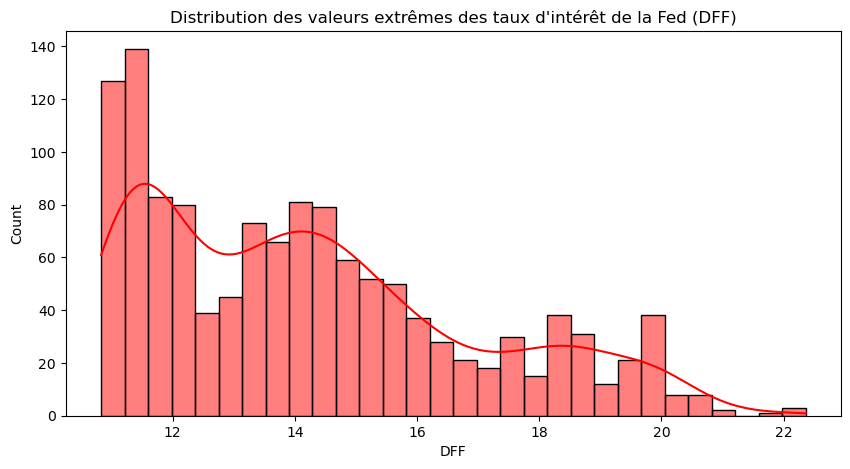

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(extremes['DFF'], bins=30, kde=True, color='red')
plt.title("Distribution des valeurs extrêmes des taux d'intérêt de la Fed (DFF)")
plt.show()

ici, on visualise la répartition des valeurs extrêmes de T10Y2Y. Cela permet de mieux comprendre comment se comportent les valeurs les plus élevées et les plus faibles de ta variable d'intérêt, et d'identifier des tendances, des asymétries ou des anomalies dans ces valeurs extrêmes.

In [30]:
shape, loc, scale = genpareto.fit(extremes['DFF'] - thresh)
print(f"Paramètres estimés de la GPD: shape={shape:.4f}, loc={loc:.4f}, scale={scale:.4f}")

Paramètres estimés de la GPD: shape=-0.4007, loc=0.0100, scale=4.7947


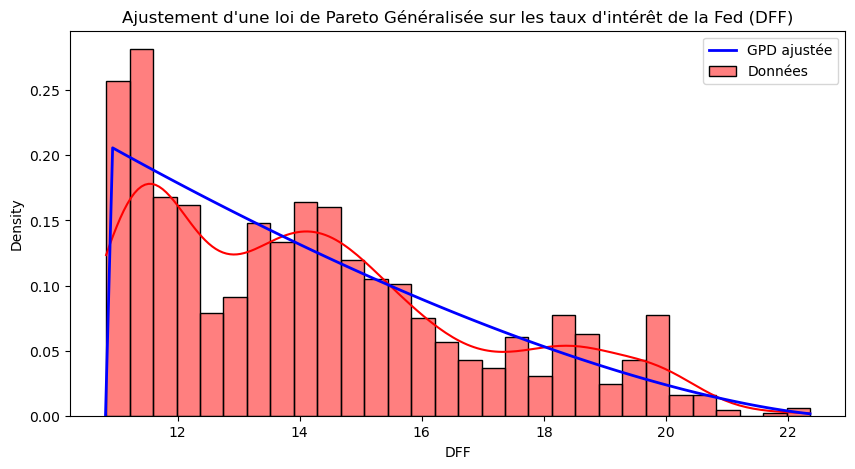

In [31]:
x = np.linspace(thresh, extremes['DFF'].max(), 100)
pdf_fitted = genpareto.pdf(x - thresh, shape, loc, scale)

plt.figure(figsize=(10, 5))
sns.histplot(extremes['DFF'], bins=30, kde=True, color='red', stat='density', label="Données")
plt.plot(x, pdf_fitted, 'b-', lw=2, label="GPD ajustée")
plt.title("Ajustement d'une loi de Pareto Généralisée sur les taux d'intérêt de la Fed (DFF)")
plt.legend()
plt.show()

In [33]:
# 6. Méthode Block Maxima (BM)
block_size = 50  # Taille des blocs (peut être ajustée selon les données)
n_blocks = len(dataset) // block_size
block_maxima = [dataset['DFF'].dropna().iloc[i * block_size: (i + 1) * block_size].max() for i in range(n_blocks)]


In [34]:
# Ajustement d'une loi GEV sur les maxima
shape_gev, loc_gev, scale_gev = genextreme.fit(block_maxima)
print(f"Paramètres estimés de la GEV: shape={shape_gev:.4f}, loc={loc_gev:.4f}, scale={scale_gev:.4f}")

Paramètres estimés de la GEV: shape=-0.0829, loc=3.2171, scale=2.9336


In [35]:
# 7. Visualisation de l'ajustement GEV
x_gev = np.linspace(min(block_maxima), max(block_maxima), 100)
pdf_gev = genextreme.pdf(x_gev, shape_gev, loc_gev, scale_gev)

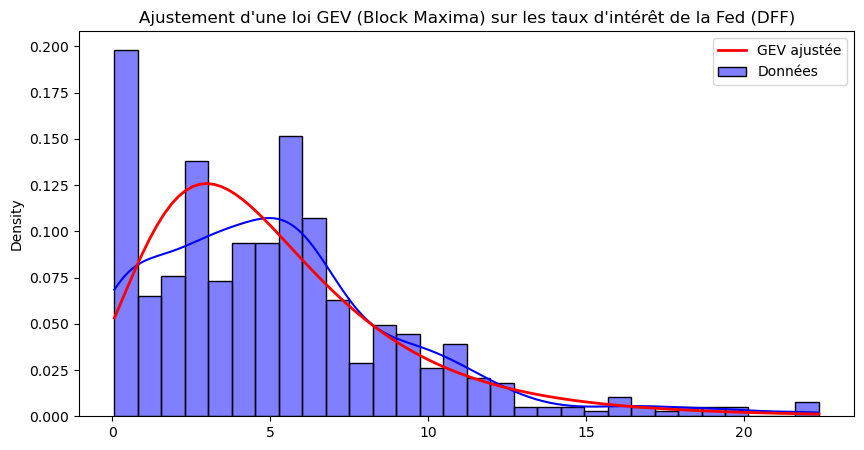

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(block_maxima, bins=30, kde=True, color='blue', stat='density', label="Données")
plt.plot(x_gev, pdf_gev, 'r-', lw=2, label="GEV ajustée")
plt.title("Ajustement d'une loi GEV (Block Maxima) sur les taux d'intérêt de la Fed (DFF)")
plt.legend()
plt.show()